In [19]:
import glob

import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from xclim.indices.generic import select_resample_op
from scipy.stats import genextreme as gev
from pyextremes import EVA

In [20]:
place_latlons = {
    'Kinglake, VIC': [-37.51, 145.31],
    'Cudlee Creek, SA': [-34.85767468906389, 138.83363778607745],
    'Lindon, SA': [-28.948116761625712, 140.0976947194418],
    'Kalgoorlie, WA': [-30.752416618872665, 121.46907701090213],
}

## Australia-wide analysis

In [21]:
def plot_aus(da, selection, title, outfile, cmap=None, levels=None, extend=None, clabel=None, plot_places=False):
    """Plot Australia
    
    Args:
      da (xarray DataArray)
      selection (dict)
    
    """
    fig = plt.figure(figsize=[12,5])
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
    da.sel(selection).plot.contourf(
        ax=ax,
        levels=levels,
        extend=extend,
        transform=ccrs.PlateCarree(),
        cbar_kwargs={'label': clabel},
        cmap=cmap,
    )
    ax.coastlines()
    ax.add_feature(cartopy.feature.STATES)
    plt.title(title)
    
    if plot_places:
        for name, location in place_latlons.items():
            lat, lon = location
            ax.plot(lon, lat, 'yo', zorder=5, transform=ccrs.PlateCarree())
    
#    plt.savefig(
#        outfile,
#        bbox_inches='tight',
#        dpi=300,
#        facecolor='white',
 #   )
    plt.show()
    plt.close()

In [22]:
ds_ffdi_ari = xr.open_dataset('/g/data/wp00/users/dbi599/test_space/ffdi_test2.nc')

In [23]:
ds_ffdi_ari

<xarray.Dataset>
Dimensions:        (lon: 886, lat: 691, return_period: 1)
Coordinates:
  * lon            (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.2 156.2
  * lat            (lat) float32 -44.5 -44.45 -44.4 ... -10.1 -10.05 -10.0
  * return_period  (return_period) float64 20.0
Data variables:
    FFDI           (return_period, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    description:  FFDI calculations. A.Dowdy, M.Thatcher, S.Osbrough
    history:      Fri Aug 19 10:12:31 2022: /g/data/wp00/users/dbi599/minicon...
    NCO:          netCDF Operators version 5.0.5 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...

In [24]:
ds_ffdi_ari_params = xr.open_dataset('/g/data/wp00/users/dbi599/test_space/param_test.nc')

In [25]:
ds_ffdi_ari_params

<xarray.Dataset>
Dimensions:  (lon: 886, lat: 691, dparams: 3)
Coordinates:
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
  * lat      (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * dparams  (dparams) object 'c' 'loc' 'scale'
Data variables:
    FFDI     (dparams, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    description:  FFDI calculations. A.Dowdy, M.Thatcher, S.Osbrough
    history:      Sat Aug 20 12:05:16 2022: /g/data/wp00/users/dbi599/minicon...
    NCO:          netCDF Operators version 5.0.5 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...

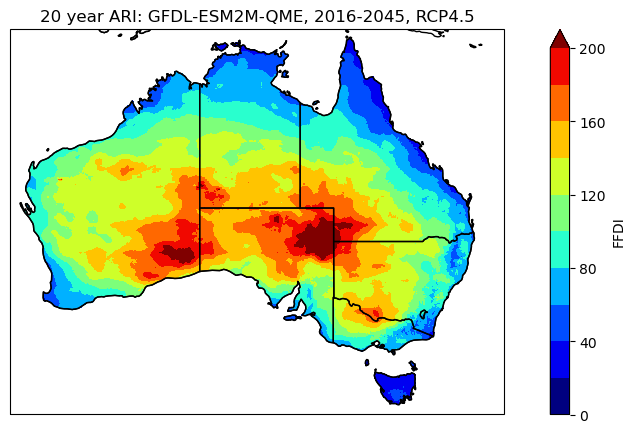

In [26]:
plot_aus(
    ds_ffdi_ari['FFDI'],
    {'return_period': 20},
    '20 year ARI: GFDL-ESM2M-QME, 2016-2045, RCP4.5',
    '/g/data/wp00/users/dbi599/test_space/ffdi_ARI_20yr_GFDL-ESM2M-QME_rcp45_2016-2045.png',
    cmap='jet',
    levels=np.arange(0, 201, 20),
    extend='max',
    clabel='FFDI',
    plot_places=False,
)

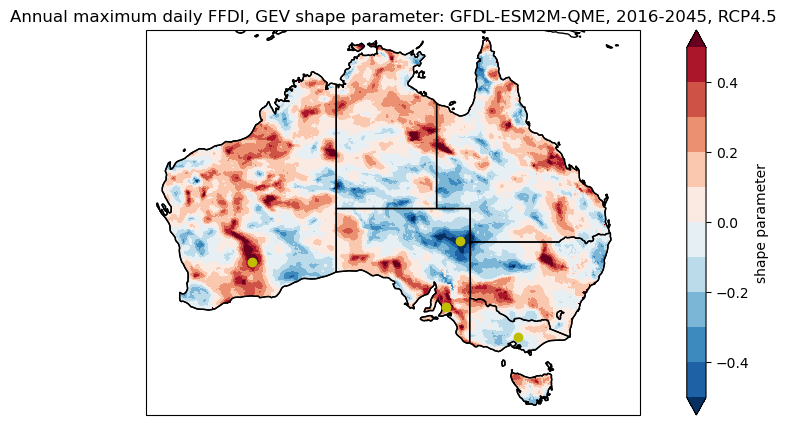

In [27]:
plot_aus(
    ds_ffdi_ari_params['FFDI'],
    {'dparams': 'c'},
    'Annual maximum daily FFDI, GEV shape parameter: GFDL-ESM2M-QME, 2016-2045, RCP4.5',
    '/g/data/wp00/users/dbi599/test_space/ffdi_annual-daily-max_GEV-shape_GFDL-ESM2M-QME_rcp45_2016-2045.png',
    levels=np.arange(-0.5, 0.51, 0.1),
    extend='both',
    clabel='shape parameter',
    plot_places=True,
)

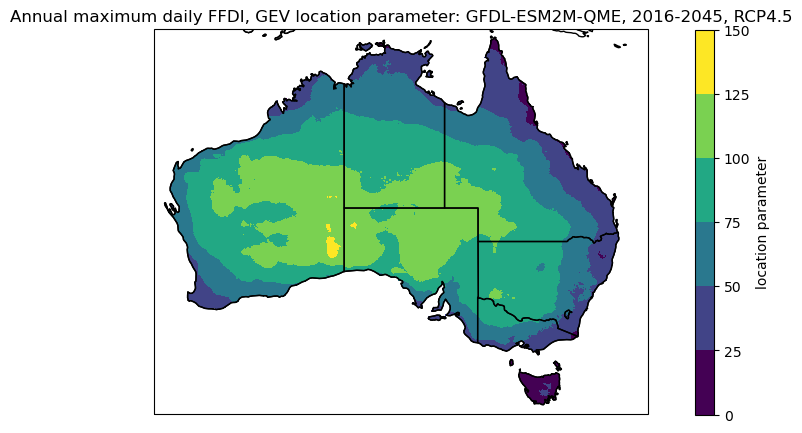

In [28]:
plot_aus(
    ds_ffdi_ari_params['FFDI'],
    {'dparams': 'loc'},
    'Annual maximum daily FFDI, GEV location parameter: GFDL-ESM2M-QME, 2016-2045, RCP4.5',
    '/g/data/wp00/users/dbi599/test_space/ffdi_annual-daily-max_GEV-location_GFDL-ESM2M-QME_rcp45_2016-2045.png',
    clabel='location parameter',
)

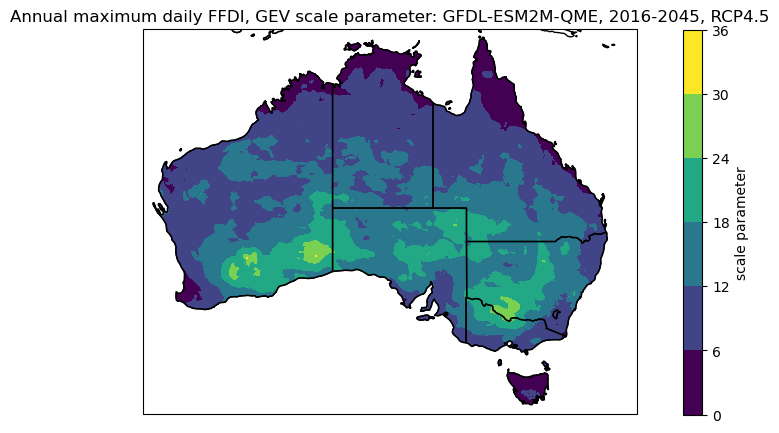

In [29]:
plot_aus(
    ds_ffdi_ari_params['FFDI'],
    {'dparams': 'scale'},
    'Annual maximum daily FFDI, GEV scale parameter: GFDL-ESM2M-QME, 2016-2045, RCP4.5',
    '/g/data/wp00/users/dbi599/test_space/ffdi_annual-daily-max_GEV-scale_GFDL-ESM2M-QME_rcp45_2016-2045.png',
    clabel='scale parameter',
)

## Point analysis

In [30]:
ffdi_files = glob.glob('/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.????.nc')
ffdi_files.sort()
ffdi_files

['/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2016.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2017.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2018.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2019.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2020.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2021.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2022.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2023.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2024.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2025.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2026.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2027.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2028.nc',
 '/g/data/wp00/QQSCALE/GFDL-ESM2M/FFDI/rcp45/2016-2045/ffdi.2029.nc',
 '/g/data/wp00/QQSCA

In [31]:
ds_ffdi = xr.open_mfdataset(ffdi_files)

In [46]:
def plot_diagnostics(place_name):
    """Plot return period diagnostics for a given grid point"""
    
    lat, lon = place_latlons[place_name]
    ffdi_point = ds_ffdi['FFDI'].sel({'lat': lat, 'lon': lon}, method='nearest', drop=True)
    str_times = [time.strftime('%Y-%m-%d') for time in ffdi_point['time'].values]
    eg_series = pd.Series(data=ffdi_point.values, index=pd.to_datetime(str_times))
    model = EVA(eg_series[181:-184])
    model.get_extremes(method='BM', block_size='365.2425D')
#    print('# The most extreme days')
#    print(model.extremes.head())
    full_timeseries_fig, ax = model.plot_extremes()
    model.fit_model(distribution='genextreme')    
    summary = model.get_summary(
        return_period=[1, 2, 5, 10, 20],
        alpha=0.95,
        n_samples=1000
    )
    print(summary)
    ari_point = ds_ffdi_ari['FFDI'].sel({'lat': lat, 'lon': lon}, method='nearest')
    return_period = ari_point.values[0]
    params_point = ds_ffdi_ari_params['FFDI'].sel({'lat': lat, 'lon': lon}, method='nearest')
    gev_shape, gev_loc, gev_scale = params_point.values
    print(f'Shape parameter: {gev_shape:.2f}')
    print(f'Location parameter: {gev_loc:.2f}')
    print(f'Scale parameter: {gev_scale:.2f}')
    print(f'Return period: {return_period:.2f}')
    diagnostic_fig, ax = model.plot_diagnostic(alpha=0.95, return_period=[1, 2, 5, 10, 20])
    

def plot_pdf(place_name, xrange=[0, 120]):
    """Plot the PDF and GEV for a given grid point."""    

    lat, lon = place_latlons[place_name]
    ffdi_point = ds_ffdi['FFDI'].sel({'lat': lat, 'lon': lon}, method='nearest')
    ffdi_point_sub = select_resample_op(
        ffdi_point,
        op='max',
        freq='Y',
    )
    ari_point = ds_ffdi_ari['FFDI'].sel({'lat': lat, 'lon': lon}, method='nearest')
    params_point = ds_ffdi_ari_params['FFDI'].sel({'lat': lat, 'lon': lon}, method='nearest')
    gev_shape, gev_loc, gev_scale = params_point.values

    fig, ax = plt.subplots(figsize=[6, 4])
    gev_xvals = np.arange(xrange[0], xrange[1])
    ffdi_point_sub.plot.hist(bins=40, density=True, color='tab:green', alpha=0.5)
    gev_pdf = gev.pdf(gev_xvals, gev_shape, gev_loc, gev_scale)
    print(f'Shape parameter: {gev_shape:.2f}')
    print(f'Location parameter: {gev_loc:.2f}')
    print(f'Scale parameter: {gev_scale:.2f}')
    return_period = ari_point.values[0]
    print(f'Return period: {return_period:.2f}')
    plt.axvline(return_period, color='0.5', linestyle=':')
    plt.plot(gev_xvals, gev_pdf, color='tab:green', linewidth=4.0)
    plt.xlabel('FFDI')
    plt.ylabel('probability')
    plt.title(place_name)
    plt.show()
    plt.close()

/g/data/wp00/users/dbi599/miniconda3/envs/cih/lib/python3.10/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/g/data/wp00/users/dbi599/miniconda3/envs/cih/lib/python3.10/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


               return value   lower ci      upper ci
return period                                       
1.0              -70.595098        NaN  2.771443e+01
2.0               47.816407  36.894590  5.309760e+01
5.0               61.568488  52.797826  1.231563e+03
10.0              71.541274  57.458791  8.287004e+04
20.0              81.813821  60.457263  5.032110e+06
Shape parameter: -0.10
Location parameter: 44.26
Scale parameter: 11.19
Return period: 82.91


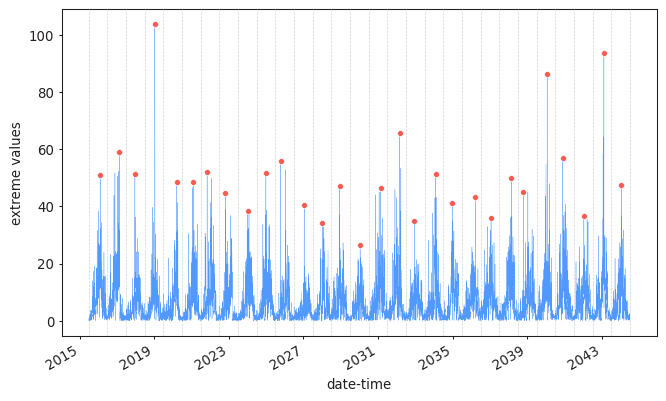

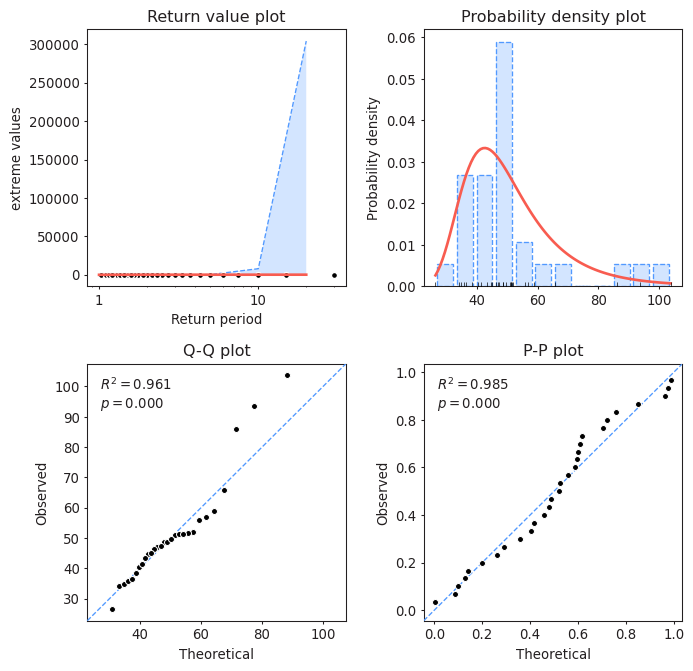

In [47]:
plot_diagnostics('Kinglake, VIC')

/g/data/wp00/users/dbi599/miniconda3/envs/cih/lib/python3.10/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


               return value   lower ci   upper ci
return period                                    
1.0                    -inf        NaN  32.265739
2.0               60.972628  51.972465  69.570999
5.0               69.314497  63.155433  75.027398
10.0              73.147147  69.121160  76.229578
20.0              75.920157  72.914736  86.751143
Shape parameter: 0.35
Location parameter: 55.31
Scale parameter: 11.17
Return period: 75.84


/g/data/wp00/users/dbi599/miniconda3/envs/cih/lib/python3.10/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


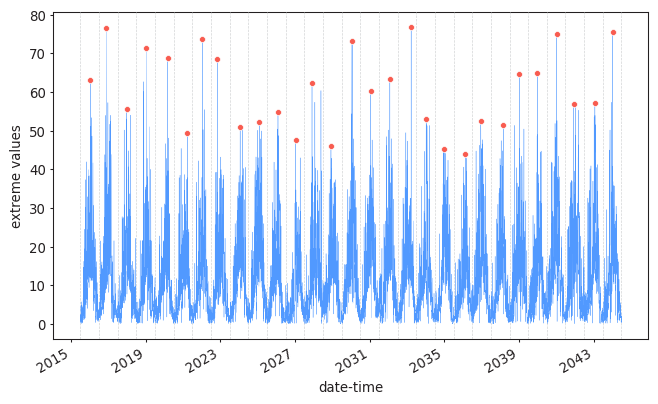

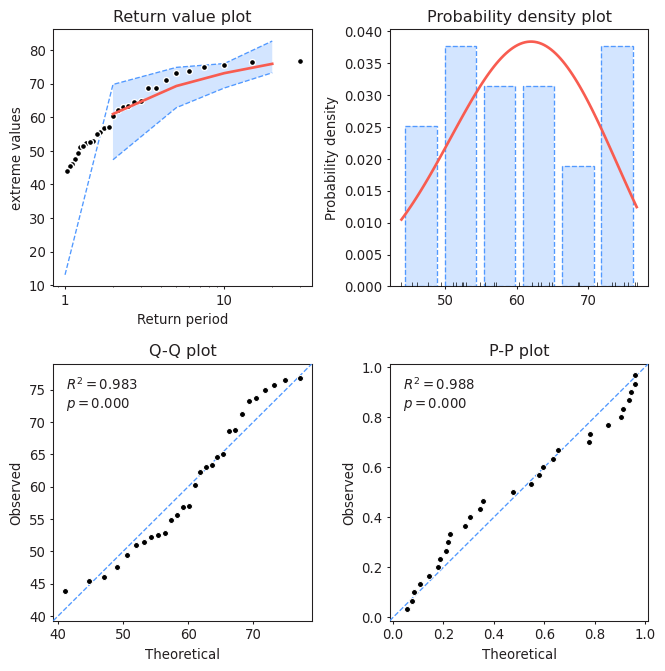

In [48]:
plot_diagnostics('Cudlee Creek, SA')

               return value    lower ci      upper ci
return period                                        
1.0               67.463883   -5.498628  8.694572e+01
2.0              110.468695   87.912227  1.241783e+02
5.0              148.802382  124.906249  1.864244e+04
10.0             191.499956  148.953330  2.866173e+06
20.0             253.384514  176.754631  4.929941e+08
Shape parameter: -0.55
Location parameter: 99.75
Scale parameter: 19.94
Return period: 249.94


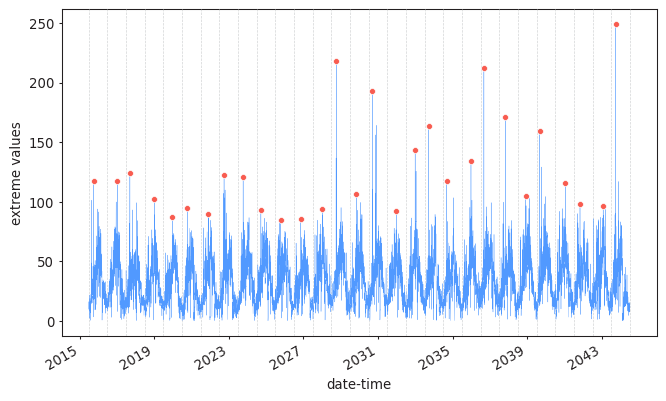

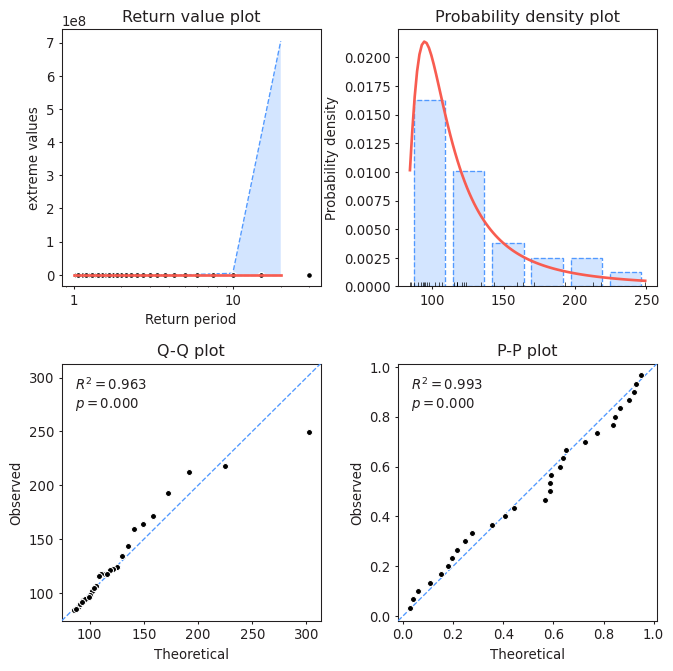

In [49]:
plot_diagnostics('Lindon, SA')

/g/data/wp00/users/dbi599/miniconda3/envs/cih/lib/python3.10/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/g/data/wp00/users/dbi599/miniconda3/envs/cih/lib/python3.10/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


               return value    lower ci      upper ci
return period                                        
1.0                    -inf         NaN  6.847452e+01
2.0              112.405554   82.953234  1.424581e+02
5.0              128.852494  120.310878  1.175016e+03
10.0             135.486511  128.197641  7.144824e+04
20.0             139.833880  132.977937  4.354645e+06
Shape parameter: 0.64
Location parameter: 106.14
Scale parameter: 25.64
Return period: 140.29


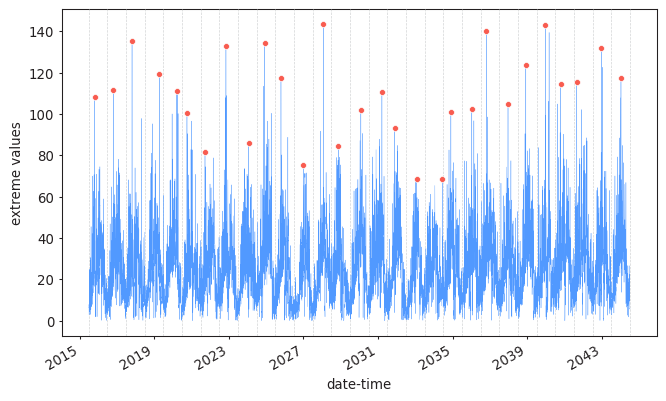

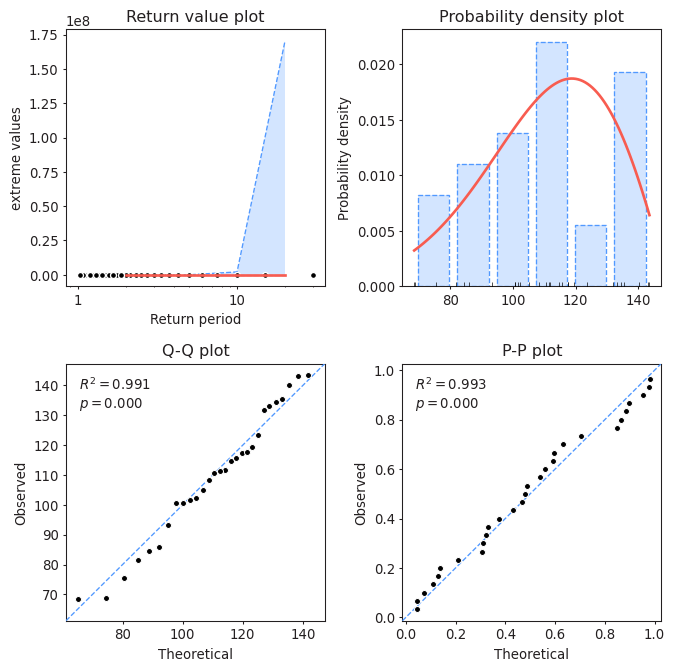

In [50]:
plot_diagnostics('Kalgoorlie, WA')